## Avocado Dataset 
Average Price Prediction using Linear Regression and Random forest Regressor

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)<br>
3. [Preprocessing](#section3) <br>
4. [Data Analysis](#section4) 
    - 4.1 [Spread of Average Price in the data](#section401)<br/>
    - 4.2 [Type of avocado vs Average price](#section402)<br/>
    - 4.3 [How Average price varies over years](#section403)<br/>
    - 4.4 [How Average price varies across regions](#section404)<br/>
6. [Predicting Average Price of Avocado](#section6)
    - 6.1 [Using Linear Regression model 1](#section601)<br>
    - 6.2 [Model Evaluation for Linear Regression model 1 ](#section602)<br> 
    - 6.3 [Using Linear Regression model 2](#section603)<br>
    - 6.4 [Model Evaluation for Linear Regression model 2](#section604)<br> 
    - 6.5 [Using Random forest Regressor](#section605)<br>
    - 6.6 [Model Evaluation for Random forest Regressor](#section606)<br> 
7. [Conclusion](#section7)<br>  


### 1. Problem Statement <a class="anchor" id="section1">

The goal is to __predict Average price__ of avocado using best regression model

### 2. Data Loading and Description <a class="anchor" id="section2">

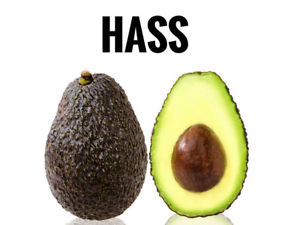

- The dataset consists of the information about HASS Avocado. Historical data on avocado prices and sales volume in multiple US markets. Various variables present in the dataset includes Date, AveragePrice,Total Volume, Total Bags,Year,Type etc. 
- The dataset comprises of __ 18249 observations of 14 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Unnamed   | SNo.                                        | 
| Date      | The date of the observation                         |  
| AveragePrice        | the average price of a single avocado                                     | 
| Total Volume          | Total number of avocados sold                                         |   
| 4046           | Total number of avocados with PLU 4046 sold                                       |
| 4225           | Total number of avocados with PLU 4225 sold                      |
| 4770         | Total number of avocados with PLU 4770 sold |
| Total Bags         |Total Number of Bags sold |
| Small Bags        | Total Number of Small Bags sold                                            |
| Large Bags          | Total Number of Large Bags sold                                         |
| XLarge Bags         | Total Number of XLarge Bags sold                                        |
| type        | Organic or Conventional                                            |
| year          | The year of observation                                           |
| region         | the city or region of the observation                                              |

#### Importing packages                                          

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from subprocess import check_output
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



#### Importing the Dataset

In [4]:
import os
print(os.listdir("../avocado"))

data_path = "../avocado/"
avocado = pd.read_csv(data_path+"avocado.csv")
avocado.head()

['avocado-price-prediction (1).ipynb', 'avocado.csv']


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## 3. Preprocessing the data <a class="anchor" id="section3">

 - Creating Dummy variables for __Type__ column
 - Use label encoder for __region__ column to convert it into numerical data
 - Dropping the column __Unnamed__ as it has only index values.
 - Renaming column 4046,4225,4770 for better understanding    

In [5]:
avocado.shape

(18249, 14)

18249 rows with 14 columns

In [6]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


The dataset has no missing values

In [7]:
avocado.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


The average price of avocado is 1.405 and minimum 0.44 maximum is 3.25

In [8]:
avocado.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
avocado.drop("Unnamed: 0", axis=1,inplace=True) #dropping the column as it pnly contains index

In [10]:
#renaming columns for better understanding
avocado.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'}, 
                 inplace=True)

In [11]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [12]:
avocado.type.unique()

array(['conventional', 'organic'], dtype=object)

There are two types of avocado - __conventional and organic__

Creating dummy variables for type column

In [13]:
avocado = pd.get_dummies(avocado, columns=['type'],drop_first=True)
avocado.head()

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,0


In [14]:
print("Organic ",avocado[avocado["type_organic"]==1]["Date"].count())
print("conventional ",avocado[avocado["type_organic"]==0]["Date"].count())

Organic  9123
conventional  9126


Establishing __coorelation__ between all the features using __heatmap__.

<AxesSubplot:>

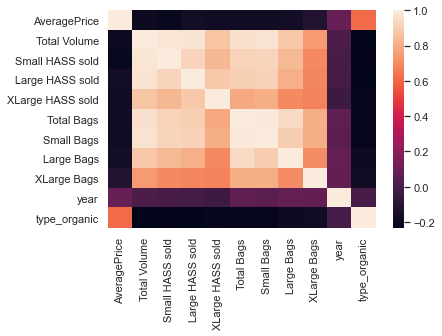

In [15]:
sns.heatmap(avocado.corr())

__Average price has more correlation with type of avocado__ and then with year compared to others

Label Encoding "region" column to convert to numerical data

In [16]:
#label encode region

le = LabelEncoder()
avocado['region'] = le.fit_transform(avocado['region'])
avocado.head()

,Date,AveragePrice,Total Volume,Small HASS sold,Large HASS sold,XLarge HASS sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


In [17]:
avocado.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

<AxesSubplot:>

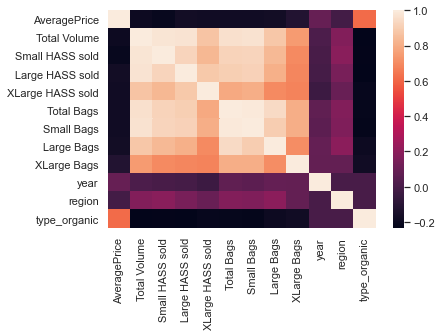

In [18]:
sns.heatmap(avocado.corr())

Now we can see some mild correlation with Average price and region

### 4. Data Analysis <a class="anchor" id="section4">

#### 4.1 Spread of Average Price in the data <a class="anchor" id="section401">

c:\Users\Rick-Royal\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Distribution of average price', ylabel='Density'>

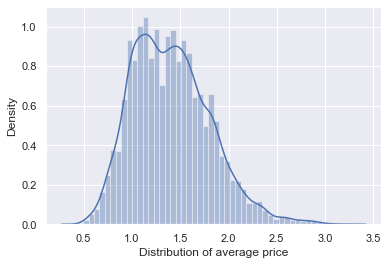

In [19]:
sns.distplot(avocado["AveragePrice"],axlabel="Distribution of average price")

Most Average price lies range from 1.0 to 1.7

#### 4.2 Type of avocado vs Average price <a class="anchor" id="section402">

<AxesSubplot:xlabel='type_organic', ylabel='AveragePrice'>

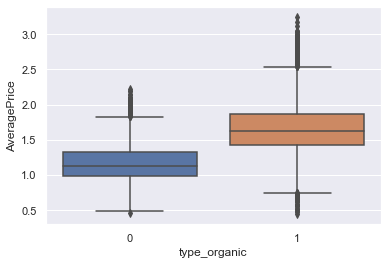

In [20]:
sns.boxplot(x="type_organic", y="AveragePrice", data=avocado)

Organic avocados are more expensive than conventional ones.

#### 4.3 How Average price varies over years <a class="anchor" id="section403">

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

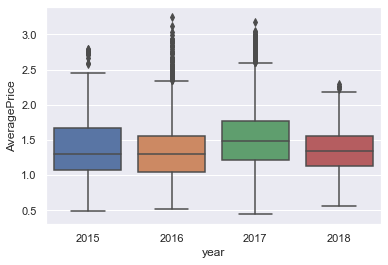

In [21]:
sns.boxplot(x="year", y="AveragePrice", data=avocado)

We notice the average price was high in 2017 compared to other years

#### 4.4 How Average price varies across regions <a class="anchor" id="section404">

<AxesSubplot:xlabel='region'>

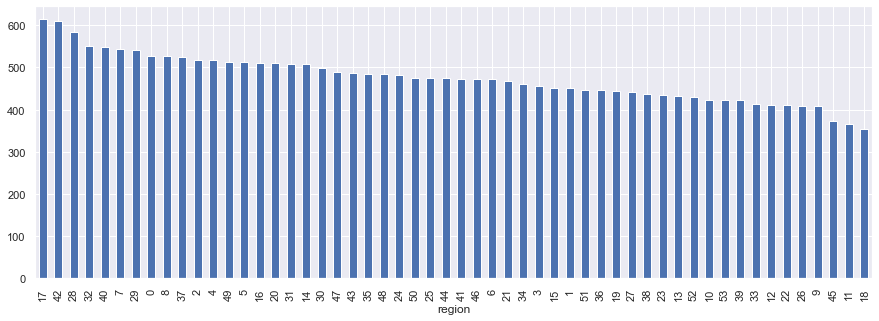

In [22]:
avocado.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

AveragePrice varies with region. Price of avocado varies from one region to another – with HartfordSpringfield being highest and Houston being lowest price to get cheap Avocado.

### 6. Predicting Average Price of Avocado    <a class="anchor" id="section6">

#### 6.1 Using Linear Regression - Model 1  <a class="anchor" id="section601">

In [ ]:
#Creating a new dataframe with few columns only and create train and test data
avocado_new=avocado[["AveragePrice","Total Volume","region","type_organic","Total Bags","year"]]

X=avocado_new[["AveragePrice","Total Volume","region","Total Bags","year"]] #feature columns
y=avocado_new.type_organic #predictor variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

scaler = StandardScaler().fit(avocado_new)
avocado_new_std = scaler.transform(avocado_new)
avocado_new = pd.DataFrame(avocado_new_std)
avocado_new.columns = ['AveragePrice', 'Total Volume', "region",'type_organic','Total Bags', 'year']
avocado_new.head()

In [ ]:
feature_cols = ['Total Volume', "region",'type_organic','Total Bags', 'year']                # create a Python list of feature names
X = avocado_new[feature_cols]                                     # use the list to select a subset of the original DataFrame-+
y = avocado_new.AveragePrice


def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)


In [ ]:
linreg1 = LinearRegression()
linreg1.fit(X_train, y_train) 

feature_cols.insert(0,'Intercept')
coef = linreg1.coef_.tolist()
coef.insert(0, linreg1.intercept_)
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

y_pred_train = linreg1.predict(X_train)
y_pred_test = linreg1.predict(X_test)

#### 6.2 Model Evaluation for Linear Regression Model 1  <a class="anchor" id="section602">

In [ ]:
print("Model Evaluation for Linear Regression Model 1")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = linreg1.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

yhat = linreg1.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

#### Adding few more columns to check if accuracy increases

In [ ]:
avocado_full=avocado[[ 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']]
avocado_full.head()

#### 6.3 Linear Regression Model 2 <a class="anchor" id="section603">

In [ ]:

scaler = StandardScaler().fit(avocado_full)
avocado_full_std = scaler.transform(avocado_full)
avocado_full = pd.DataFrame(avocado_full_std)
avocado_full.columns = [ 'AveragePrice', 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']

feature_cols = [ 'Total Volume', 'Small HASS sold',
       'Large HASS sold', 'XLarge HASS sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type_organic', 'year', 'region']                # create a Python list of feature names
X = avocado_full[feature_cols]                                     # use the list to select a subset of the original DataFrame-+

y = avocado_full.AveragePrice


def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test, y_train, y_test=split(X,y)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)


In [ ]:

linreg2 = LinearRegression()
linreg2.fit(X_train, y_train) 

feature_cols.insert(0,'Intercept')
coef = linreg2.coef_.tolist()
coef.insert(0, linreg2.intercept_)
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

y_pred_train = linreg2.predict(X_train)
y_pred_test = linreg2.predict(X_test)    


#### 6.4 Model Evaluation for Linear Regression model 2 <a class="anchor" id="section604">

In [ ]:
print("Model Evaluation for Linear Regression Model 2")

RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = linreg2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, "and adjusted_r_squared for train data",adjusted_r_squared)

yhat = linreg2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, "and adjusted_r_squared for test data",adjusted_r_squared)

Accuracy increased by adding more columns

#### Now lets predict using random forest 

#### 6.5 Predict using Random Forest Regressor <a class="anchor" id="section605">

In [ ]:
model2 = RandomForestRegressor(random_state = 0)
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test) 

#### 6.6 Model Evaluation for Random Forest Regressor <a class="anchor" id="section606">

In [ ]:
print("Model Evaluation for Random Forest Regressor ")
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

yhat = model2.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print("r_squared for train data ",r_squared, " and adjusted_r_squared for train data",adjusted_r_squared)

yhat = model2.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r_squared for test data ",r_squared, " and adjusted_r_squared for test data",adjusted_r_squared)

Random forest model predict average price of avocado better than linear model

### 7. Conclusion  <a class="anchor" id="section7">

- Columns like Type of avocado, Year, Region have impact on Average Price
- Adding few more columns like bags sold and sales of different avocado types helped in predicting Average price more accurately
- Random Forest Regressor model predicts the average price more accurately than linear regression model